# Density based clutering (DBSCAN)
 density-based spatial clustering of applications with noise.

adding required packages

In [138]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt


generating random data

In [139]:
n.random.seed(0)
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1500,centers=[[4,3], [2,-1], [-1,4]],cluster_std=0.5)
x.shape,y.shape

((1500, 2), (1500,))

In [140]:
x[0:10],y[0:10]

(array([[ 2.85615261, -1.39605751],
        [-0.58693715,  3.97112172],
        [ 2.22979245, -0.85997107],
        [ 4.23521657,  3.15572354],
        [ 4.22409764,  3.84809079],
        [ 4.30703969,  3.46110334],
        [-1.07381871,  4.56590598],
        [ 4.03325861,  3.15123595],
        [ 4.94157535,  2.32612047],
        [-0.7516924 ,  4.50606659]]),
 array([1, 2, 1, 0, 0, 0, 2, 0, 0, 2]))

data normalisation

In [141]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
x[0:10],y[0:10]

(array([[ 0.57149042, -1.5356006 ],
        [-1.05523383,  0.89665977],
        [ 0.27555993, -1.29266073],
        [ 1.22304381,  0.52714338],
        [ 1.21779056,  0.84090548],
        [ 1.2569774 ,  0.66553324],
        [-1.28526619,  1.1661999 ],
        [ 1.12762663,  0.52510973],
        [ 1.55677051,  0.15118972],
        [-1.1330742 ,  1.13908231]]),
 array([1, 2, 1, 0, 0, 0, 2, 0, 0, 2]))

getting data into dataframe

In [142]:
df=p.DataFrame()

df['x']=x[:,0]
df['y']=x[:,1]
df['label']=y
df.head()

,x,y,label
0,0.571490,-1.535601,1
1,-1.055234,0.896660,2
2,0.275560,-1.292661,1
3,1.223044,0.527143,0
4,1.217791,0.840905,0


scatter plot

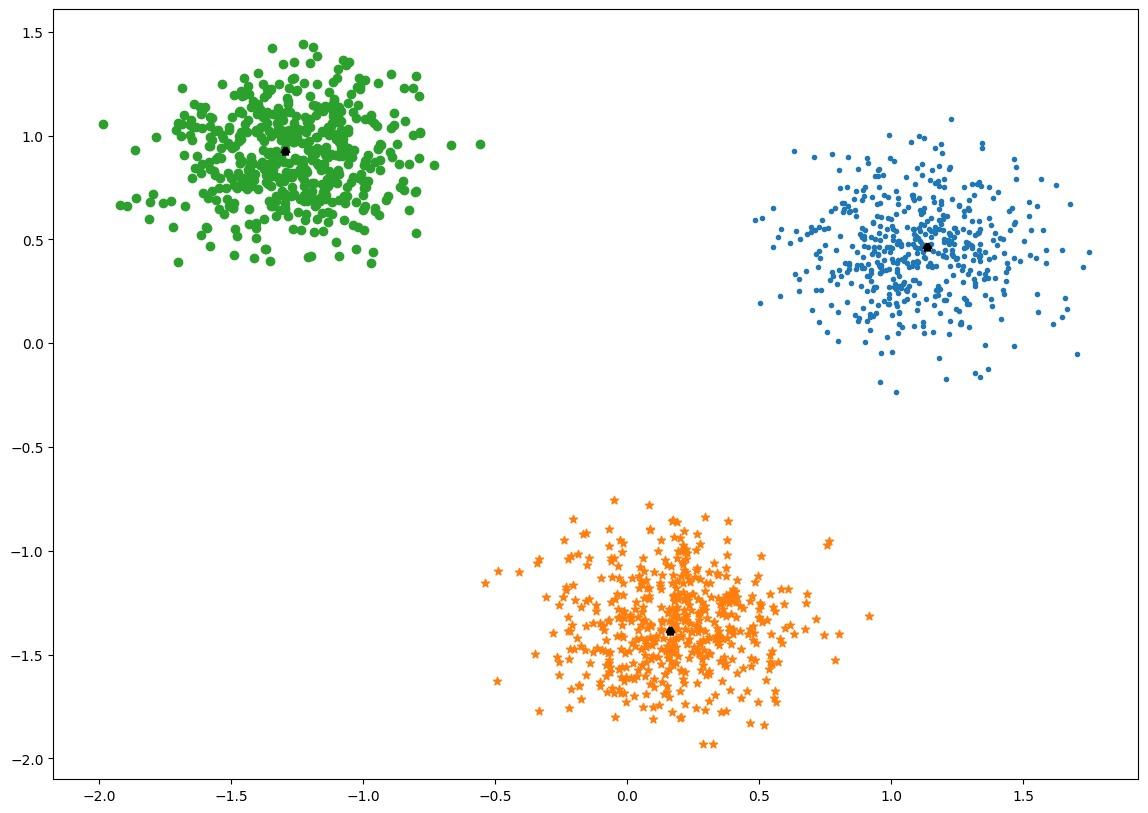

In [143]:
plt.scatter(df[df['label']==0]['x'],df[df['label']==0]['y'],marker='.')
plt.scatter(df[df['label']==1]['x'],df[df['label']==1]['y'],marker='*')
plt.scatter(df[df['label']==2]['x'],df[df['label']==2]['y'],marker='o')
centers=[[4,3], [2,-1], [-1,4]]
nc=StandardScaler().fit_transform(centers)
plt.scatter(nc[0][0],nc[0][1],color='black',marker='1',linewidths=5)
plt.scatter(nc[1][0],nc[1][1],color='black',marker='1',linewidths=5)
plt.scatter(nc[2][0],nc[2][1],color='black',marker='1',linewidths=5)




### DBSCAN model

In [144]:
epslion=0.3
min_samples=7

from sklearn.cluster import DBSCAN
db=DBSCAN(eps=epslion,min_samples=min_samples).fit(x)
db_labels=db.labels_
p.Series(db_labels).value_counts()

0    500
1    500
2    500
dtype: int64

#### distinguish outliers
**core_sample_indices_ gives the indices of the core samples**.
**from this we can get samples only in the core and boundaries but not outliers**


In [145]:
core_samples_mask = n.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print(core_samples_mask)
print()
print(p.Series(core_samples_mask).value_counts())


[ True  True  True ...  True  True  True]

True     1498
False       2
dtype: int64


finding number of clusters in the models

In [146]:
p.Series(db_labels).value_counts()

0    500
1    500
2    500
dtype: int64

there are three clusters

In [147]:
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
unique_labels = set(db_labels)
n_clusters_,unique_labels

(3, {0, 1, 2})

In [148]:
set(db_labels)-(set(-1) if -1 in set(db_labels) else set() )

{0, 1, 2}

data visualisation

In [149]:
colors=plt.cm.Spectral(n.linspace(0,1,len(unique_labels)))
# colors=plt.cm.Spectral([1,2,3])
colors=n.array(colors)

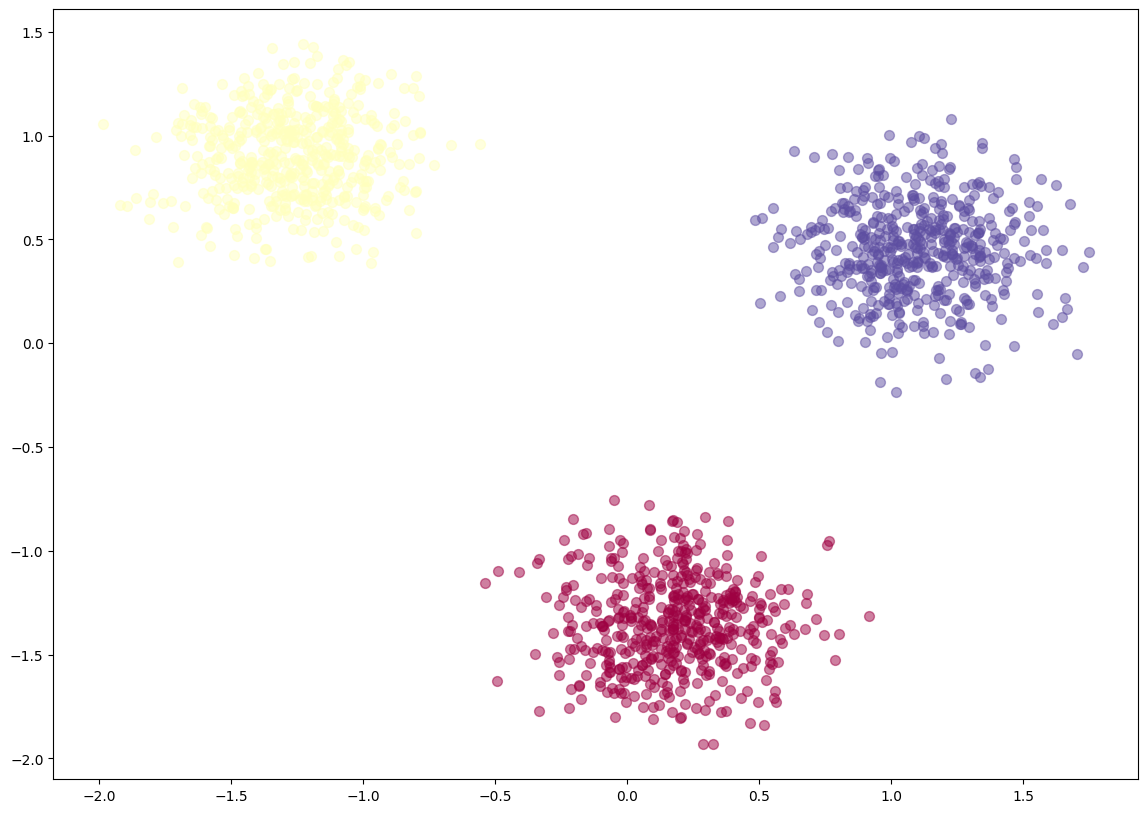

In [150]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

for k,col in zip(unique_labels,colors):
    if k== -1:
        col='k'


    class_member_mask=(db_labels==k)
    xy=x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1],s=50,c=col, marker=u'o',alpha=0.5)


    xy=x[class_member_mask & ~core_samples_mask ]
    plt.scatter(xy[:,0],xy[:,1],s=50,c=col, marker=u'o',alpha=0.5)


    
        


### implementing k-means - 3 clusters

In [151]:
x[0:10],y[0:5]

(array([[ 0.57149042, -1.5356006 ],
        [-1.05523383,  0.89665977],
        [ 0.27555993, -1.29266073],
        [ 1.22304381,  0.52714338],
        [ 1.21779056,  0.84090548],
        [ 1.2569774 ,  0.66553324],
        [-1.28526619,  1.1661999 ],
        [ 1.12762663,  0.52510973],
        [ 1.55677051,  0.15118972],
        [-1.1330742 ,  1.13908231]]),
 array([1, 2, 1, 0, 0]))

In [152]:
from sklearn.cluster import KMeans
kmeans=KMeans(init='k-means++',n_clusters=3,n_init=12)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=12)

In [153]:
km_labels=kmeans.labels_
km_labels.shape

(1500,)

In [154]:
df1=p.DataFrame()
df1['x']=x[:,0]
df1['y']=x[:,1]

df1['labels']=km_labels


In [155]:
df1[df1['labels']==2]['y']

3       0.527143
4       0.840905
5       0.665533
7       0.525110
8       0.151190
          ...   
1493    0.554710
1495    0.338479
1496    0.996018
1497    0.360429
1499    0.553628
Name: y, Length: 500, dtype: float64

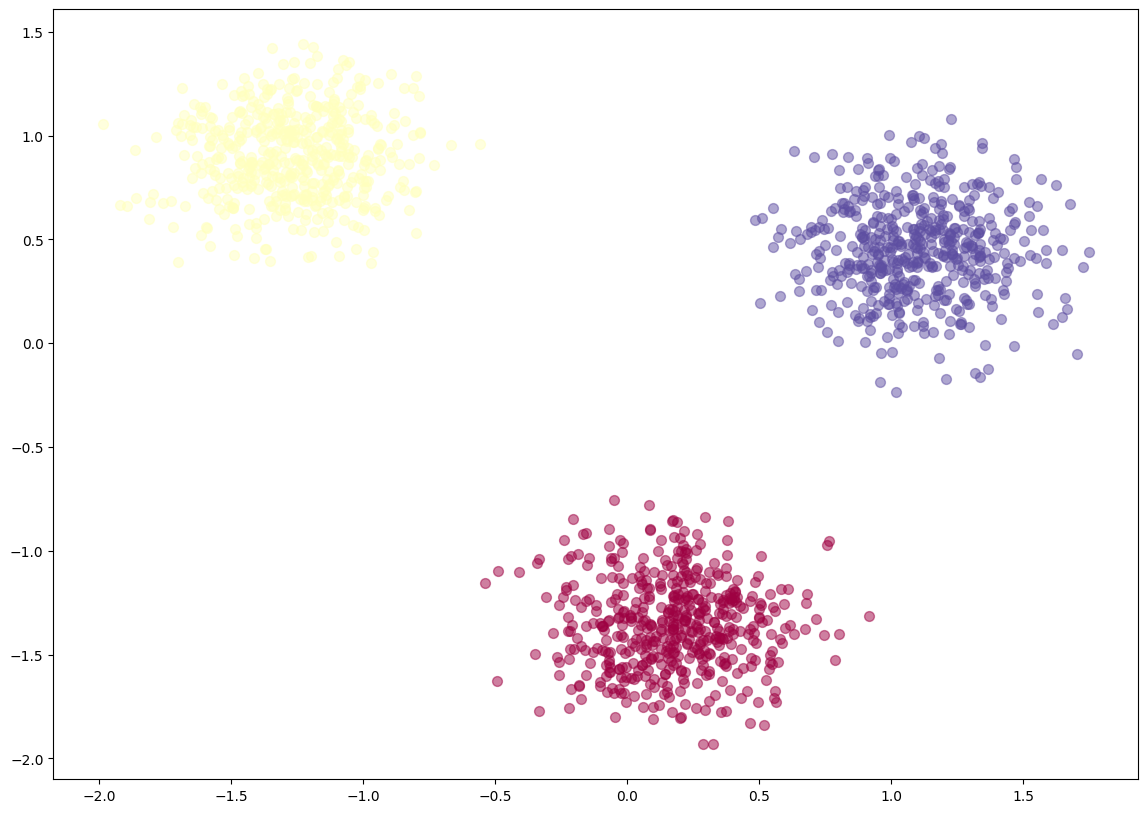

In [156]:
from cProfile import label


colors1=plt.cm.Spectral(n.linspace(0,1,len(set(km_labels))))

label_set=set(km_labels)


for k,col in zip(label_set,colors1):
    x1=df1[df1['labels']==k]['x']
    y1=df1[df1['labels']==k]['y']
    plt.scatter(x1,y1,s=50, c=[col], marker=u'o', alpha=0.5)




### Weather Station Clustering using DBSCAN & scikit-learn

reading data from csv file

In [157]:
df_ws=p.read_csv('weather-stations.csv')
df_ws.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [158]:
df_ws.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

### About the dataset

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
} </style>

</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>

</table>

</body>
</html>


In [159]:

df_ws=df_ws[p.notnull(df_ws['Tm'])]
df_ws=df_ws.reset_index(drop=True)


visualization

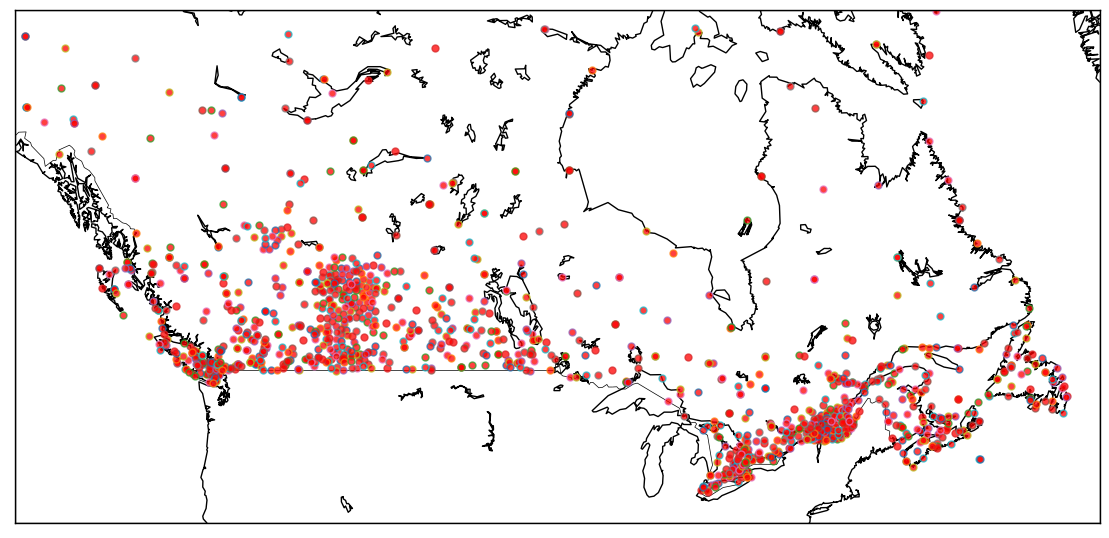

In [160]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

df_ws = df_ws[(df_ws['Long'] > llon) & (df_ws['Long'] < ulon) & (df_ws['Lat'] > llat) &(df_ws['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

      

xs,ys = my_map(n.asarray(df_ws.Long), n.asarray(df_ws.Lat))
df_ws['xm']= xs.tolist()
df_ws['ym'] =ys.tolist()


for index,row in df_ws.iterrows():
   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)

plt.show()



Clustering of stations based on their location i.e. Lat & Lon

In [161]:
from distutils import core
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

clust_dataset=df_ws[['xm','ym']]
clust_dataset=n.nan_to_num(clust_dataset)
clust_dataset=StandardScaler().fit_transform(clust_dataset)


dbscan=DBSCAN(eps=0.15,min_samples=10).fit(clust_dataset)

core_samples_mask=n.zeros_like(dbscan.labels_,dtype=bool)
core_samples_mask[dbscan.core_sample_indices_]=True

ws_labels=dbscan.labels_
df_ws['clus_db']=ws_labels

df_ws[['Stn_Name','Tx','Tm','clus_db']].head()



,Stn_Name,Tx,Tm,clus_db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


In [162]:
clusterNum=len(set(ws_labels))

C:\Users\hemas\AppData\Local\Temp\ipykernel_8348\2983076062.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[n.int(clust_number)])


Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


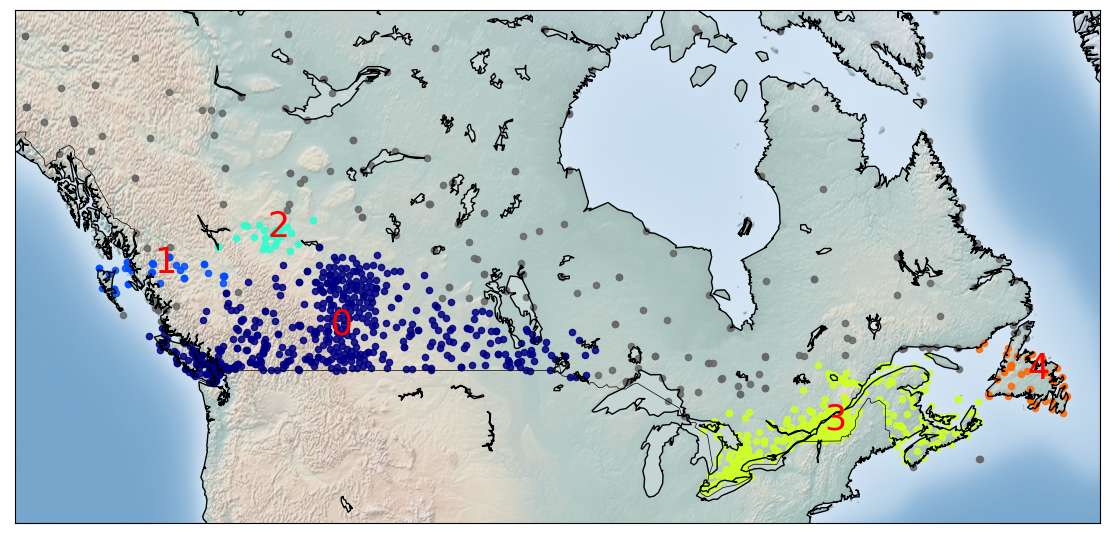

In [163]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(n.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(ws_labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[n.int(clust_number)])
    clust_set = df_ws[df_ws.clus_db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=n.mean(clust_set.xm) 
        ceny=n.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(n.mean(clust_set.Tm)))

7- Clustering of stations based on their location, mean, max, and min Temperature


In [164]:
sklearn.utils.check_random_state(1000)

clust_dataset2=df_ws[['xm','ym','Tx','Tm','Tn']]
clust_dataset2=n.nan_to_num(clust_dataset2)
clust_dataset2=StandardScaler().fit_transform(clust_dataset2)

dbscan2=DBSCAN(eps=0.3,min_samples=10).fit(clust_dataset2)
core_samples_mask2=n.zeros_like(dbscan2.labels_,dtype=bool)
core_samples_mask2[dbscan2.core_sample_indices_]=True

label2=dbscan2.labels_
df_ws['clus_db2']=label2

df_ws[['Stn_Name','xm','ym','Tx','Tm','Tn','clus_db2']].head()


,Stn_Name,xm,ym,Tx,Tm,Tn,clus_db2
0,CHEMAINUS,1.807806e+06,1.396332e+06,13.5,8.2,1.0,0
1,COWICHAN LAKE FORESTRY,1.764329e+06,1.377564e+06,15.0,7.0,-3.0,0
2,LAKE COWICHAN,1.773336e+06,1.378409e+06,16.0,6.8,-2.5,0
3,DUNCAN KELVIN CREEK,1.809363e+06,1.362546e+06,14.5,7.7,-1.0,0
4,ESQUIMALT HARBOUR,1.841498e+06,1.311615e+06,13.1,8.8,1.9,0


In [165]:
clusterNum=len(set(label2))
set(label2)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

C:\Users\hemas\AppData\Local\Temp\ipykernel_8348\791305926.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[n.int(clust_number)])


Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


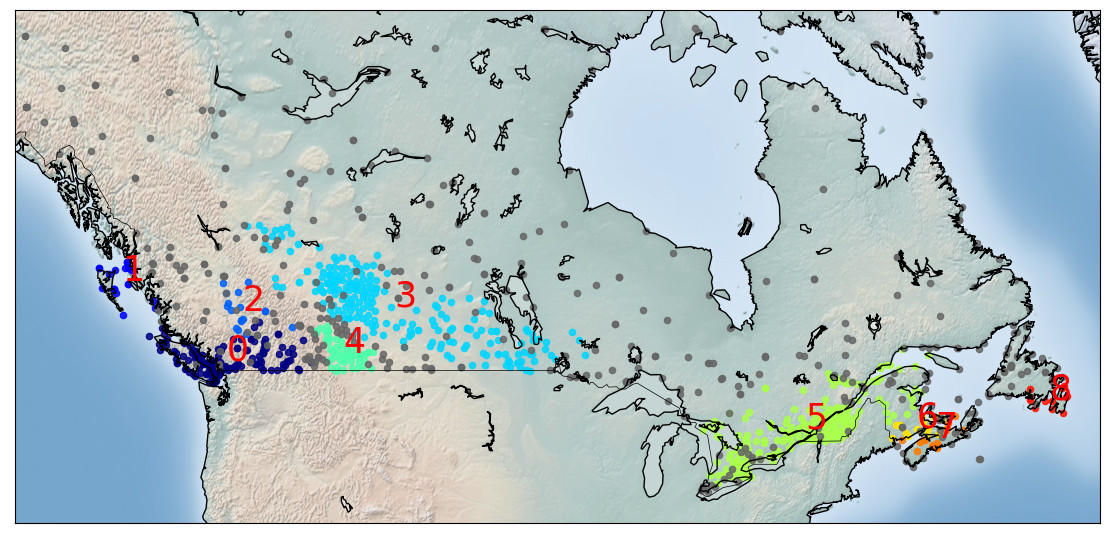

In [166]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(n.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(label2):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[n.int(clust_number)])
    clust_set = df_ws[df_ws.clus_db2 == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=n.mean(clust_set.xm) 
        ceny=n.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(n.mean(clust_set.Tm)))